# Load Data & import libraries

In [1]:
import helperfunction as hf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.precision', 3)

### Datasets

#### df_bom (bom.movie_gross.csv)
- title and domestic/foreign gross revenues
- 3387 titles from 2010 to 2018

#### df_imdb_name (imdb.name.basics.csv)
- database of professionals: ID, name, birth/death years, profession, and max four known titles
- 606638 names

#### df_imdb_akas (imdb.title.akas.csv)
- database of international versions: movie ID, titles in different languages, region, and languages
- 331703 versions

#### df_imdb_basics (imdb.title.basics.csv)
- basic information by title: movie ID, primary/original titles, year, length, and genres
- 146144 IDs (136071 unique primary titles)

#### df_imdb_crew (imdb.title.crew.csv)
- directors/writers by movie
- 146144 movies

#### df_imdb_principals
- movies-professionals database: movie ID, professional ID, category (actor/actoress, director etc), and character
- 1028186 roles

#### df_imdb_ratings (imdb.title.ratings.csv)
- rating and voter number by movie
- 73856 movies

#### df_rt_movies (rt.movie_info.tsv)
- movie ID/title, rating, genre, director, writer, release date, box office revenue, length, and studio
- 1560 movies with some null values

#### df_rt_reviews (rt.reviews.tsv.gz)
- critics rating database: movie ID, comments, rating, fresh/rotten, critic name, top critic dummy, publisher, and date
- 54432 reviews of 1135 titles with some null values

#### df_tmdb_movies (tmdb.movies.csv)
- genre, movie ID, language, original title, pupularity score, release date, title, vote rating, vote count
- 26517 movies from 1930 to 2020

#### df_budget (tn.movie_budgets.csv)
- release date. movie title, production budget, domestic/global sales
- 5782 movies from 1915 to 2020      

We use only TMDB and The Numbers data in this notebook

In [2]:
# df_bom = pd.read_csv('data/bom.movie_gross.csv.gz')
# df_imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz')
# df_imdb_akas = pd.read_csv('data/imdb.title.akas.csv.gz')
# df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
# df_imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz')
# df_imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
# df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
# df_rt_movies = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', parse_dates=['theater_date','dvd_date'])
# df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t',encoding = 'unicode_escape', parse_dates=['date'])
df_tmdb_movies = pd.read_csv(
    'data/tmdb.movies.csv.gz', parse_dates=['release_date'])
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz',
                        parse_dates=['release_date'])

### TMDB data needs genre conversion

In [3]:
# data from the website
tmdb_genre_raw = [{"id": 28, "name": "Action"},
                  {"id": 12, "name": "Adventure"},
                  {"id": 16, "name": "Animation"},
                  {"id": 35, "name": "Comedy"},
                  {"id": 80, "name": "Crime"}, 
                  {"id": 99, "name": "Documentary"}, 
                  {"id": 18, "name": "Drama"}, 
                  {"id": 10751, "name": "Family"}, 
                  {"id": 14, "name": "Fantasy"}, 
                  {"id": 36, "name": "History"}, 
                  {"id": 27, "name": "Horror"}, 
                  {"id": 10402, "name": "Music"}, 
                  {"id": 9648, "name": "Mystery"}, 
                  {"id": 10749, "name": "Romance"}, 
                  {"id": 878, "name": "Science Fiction"}, 
                  {"id": 10770, "name": "TV Movie"}, 
                  {"id": 53, "name": "Thriller"}, 
                  {"id": 10752, "name": "War"}, 
                  {"id": 37, "name": "Western"}]
# Creating conversion dictionary
tmdb_genre_dict = {}
for element in tmdb_genre_raw:
    tmdb_genre_dict[element['id']] = element['name']
print(tmdb_genre_dict)
# spliting the genre column
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.str.strip('[]').str.split(',')
# creating dummy variables for each genre
for element in tmdb_genre_dict:
    df_tmdb_movies[tmdb_genre_dict[element]] = 0
    df_tmdb_movies.loc[df_tmdb_movies.genre_ids.apply(lambda x: str(element) in x), tmdb_genre_dict[element]] = 1
df_tmdb_movies['year'] = df_tmdb_movies.release_date.dt.year
df_tmdb_movies['month'] = df_tmdb_movies.release_date.dt.month

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


### Subsetting the TMDB data for years 2009-2018

In [4]:
df_tmdb_movies_2009_2018 = df_tmdb_movies[(df_tmdb_movies['release_date'].dt.year >= 2009) & (
    df_tmdb_movies['release_date'].dt.year <= 2018) & (df_tmdb_movies.vote_count >= 10) & (df_tmdb_movies.original_language == 'en')]

### Removing duplicates from TMDB data

In [5]:
df_tmdb_movies_2009_2018 = df_tmdb_movies_2009_2018.drop_duplicates(subset='title')
df_tmdb_movies_2009_2018['log_popularity'] = np.log(df_tmdb_movies_2009_2018.popularity)

### Histgrams of popularity by genre (Log)

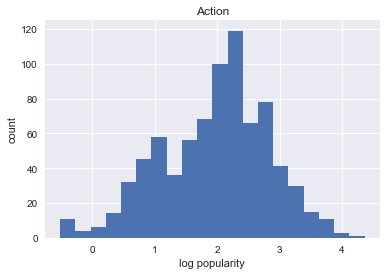

mean
1.969031279136505
std
0.8719432060019433


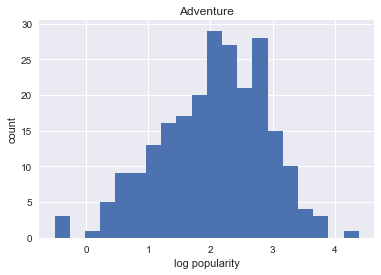

mean
2.052938941886282
std
0.8649790578722999


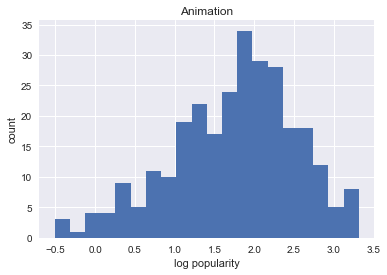

mean
1.7502980951933491
std
0.7849513572929304


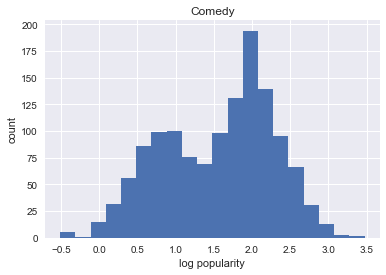

mean
1.5645644407448613
std
0.7251697252461927


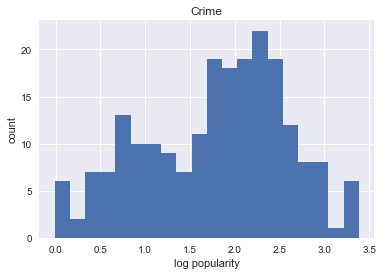

mean
1.7886132628077607
std
0.7947233920683496


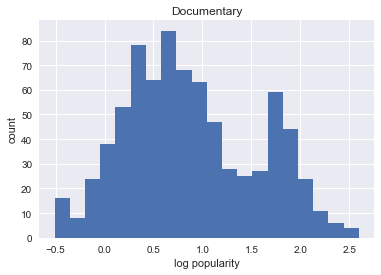

mean
0.8796967800974475
std
0.6718321505332001


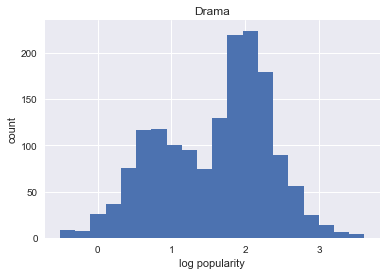

mean
1.589452661794308
std
0.7531231440470005


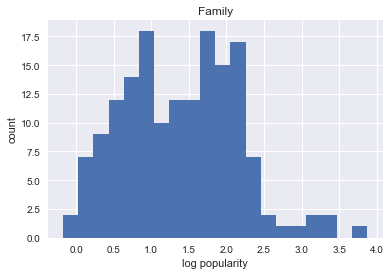

mean
1.3887890784268686
std
0.7707267263338209


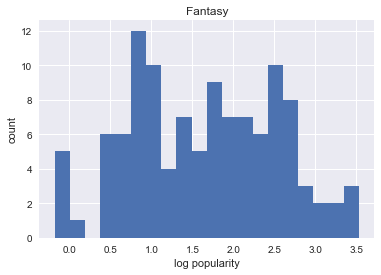

mean
1.6541489996747467
std
0.8951848619681355


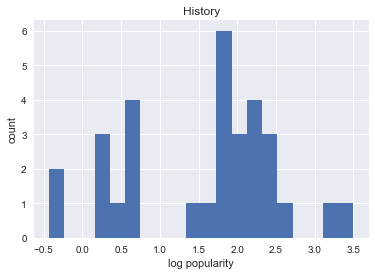

mean
1.5773392070803396
std
0.9932301119815582


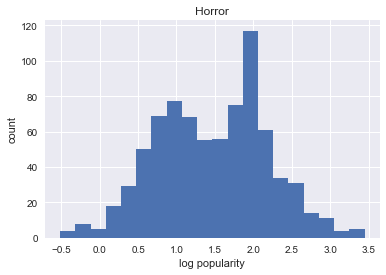

mean
1.4709519468968206
std
0.7218321094770448


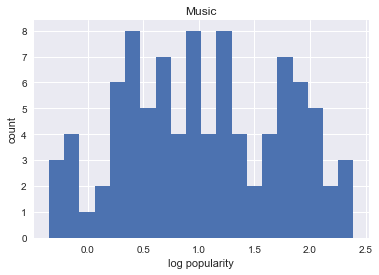

mean
1.0447607619622274
std
0.7107303527228057


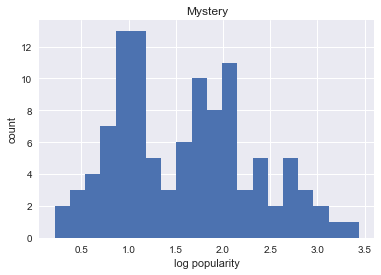

mean
1.592746437816591
std
0.7298776002458462


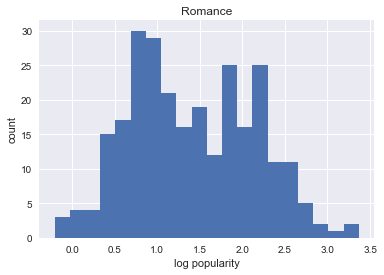

mean
1.4129976860074756
std
0.7339828658248702


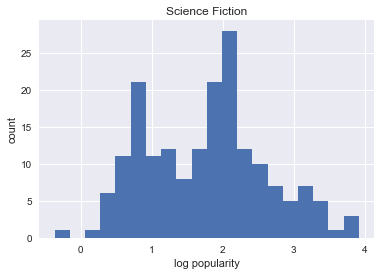

mean
1.7719502323595206
std
0.8599939209182895


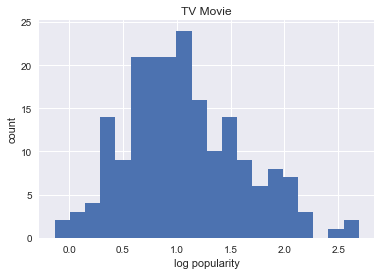

mean
1.06550566281072
std
0.5467299073386196


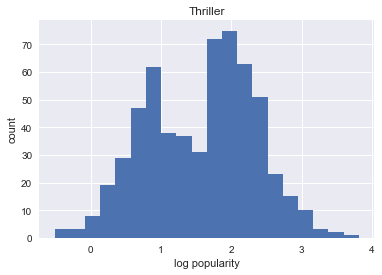

mean
1.5737766896657772
std
0.7695074082035558


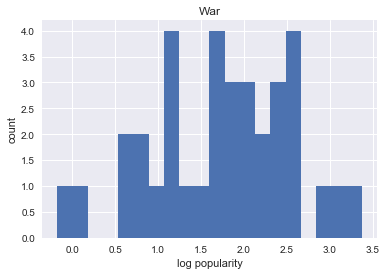

mean
1.7404995782012107
std
0.8391621028159743


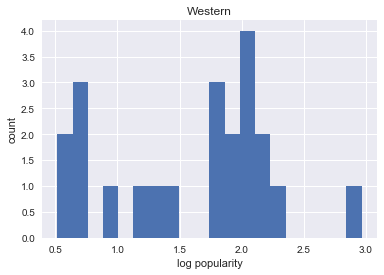

mean
1.5861494455974936
std
0.6771384700714775


In [6]:
boxplot = []
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('log popularity')
    plt.ylabel('count')
    plt.show()
    boxplot.append(df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'])
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].std())

### Comparing popularity by genre

<Figure size 864x216 with 0 Axes>

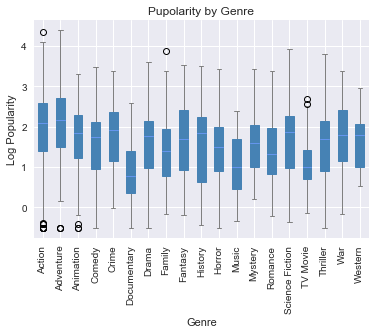

In [7]:
df_boxplot = pd.DataFrame(boxplot).T
df_boxplot.columns=list(tmdb_genre_dict.values())
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")

plt.figure(figsize=(12,3))
df_boxplot.plot.box(color=props, patch_artist=True)

plt.title('Pupolarity by Genre')
plt.xlabel('Genre')
plt.ylabel('Log Popularity')
plt.xticks(rotation=90)
#plt.grid(False)
plt.show()

### Examining the relathionship between release month and popularity

Text(0.5, 1.0, 'Popularity of Movies by Release Month')

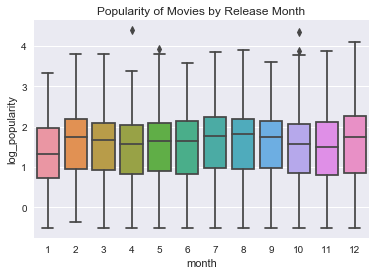

In [8]:
month = df_tmdb_movies_2009_2018.month
lpop = df_tmdb_movies_2009_2018.log_popularity
sns.boxplot(x = month, y = lpop)
plt.title("Popularity of Movies by Release Month")

### Movie genre in the market

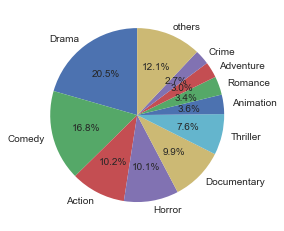

In [9]:
genre_share = df_tmdb_movies_2009_2018[list(tmdb_genre_dict.values())].sum()*100/df_tmdb_movies_2009_2018[list(tmdb_genre_dict.values())].sum().sum()
genre_share = genre_share.sort_values(ascending=False)
genre_share_plot = genre_share[0:10]
genre_share_plot['others'] = 100-genre_share_plot.sum()

fig1, ax1 = plt.subplots()
ax1.pie(genre_share_plot, labels=list(genre_share_plot.index), autopct='%1.1f%%', startangle=90)
ax1.set_xticklabels(labels=list(genre_share_plot.index),fontdict={'fontsize': 20})

plt.show()

# process tn.movie_budgets.csv data set for budget, and revenues

In [10]:
# focus on tn.movie budget first
file = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/tn.movie_budgets.csv.gz'
budget = pd.read_csv(file, parse_dates=['release_date'])
# we don't need id coloumn
hf.drop_columns(budget, 'id')
# remove anything after Dec 2018 as they aren't enough time
budget = budget[budget.release_date <= '2018-12-31']
# remove dollar and comma sign and turn column 2 to 4 into numeric value
hf.stringtonum(budget, budget.columns[-3:], '$,')
# remove value 0 for both domestic_gross and worldwide_gross (also noticed some values are not correct)
# we decided to abandon profit % because the values seem to be off and ad fee is not included, not accurate
masks = hf.create_masks(budget, ['domestic_gross', 'worldwide_gross'], [
                        0, 0], [np.equal, np.equal])
budget = budget[~(masks[0] & masks[1])]
# save budget file as a pkl
budget.to_pickle('movie_budget_info.pkl')

# Double confirm the budget data with bom.movie_gross.csv

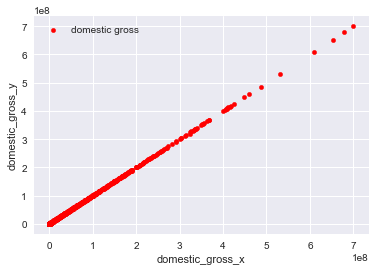

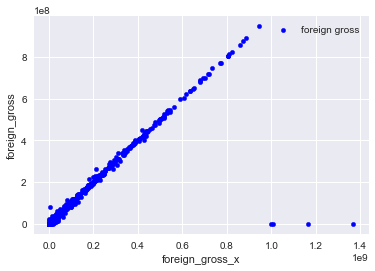

In [11]:
# load data
file = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/bom.movie_gross.csv.gz'
bom = pd.read_csv(file)
# change column name so we can merge using 'title'
hf.rename_columns(budget, {'movie': 'title'})
# create a year column for budget because same title can be released during different years
budget['year'] = budget.release_date.dt.year
# merge the two table using both title and year
budget_bom = hf.merge_tables(budget, bom, ['title', 'year'], 'inner')
# convert foreign_gross as a float to perform scatter plot
hf.stringtonum(budget_bom, ['foreign_gross'], ',')
# create foreign_gross_x to compare with each other
budget_bom['foreign_gross_x'] = budget_bom['worldwide_gross'] - \
    budget_bom['domestic_gross_x']
# check for if the revenue match from both table
budget_bom.plot(kind="scatter", x="domestic_gross_x",
                y="domestic_gross_y", color="r", label="domestic gross")
budget_bom.plot(kind='scatter', x="foreign_gross_x",
                y="foreign_gross", color="b", label="foreign gross")
plt.show()
# we confirmed budget dataset using bom

# import and prepare tmdb.movies.csv
# extract genres vs popularity insights 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/sit

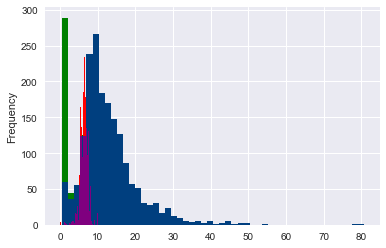

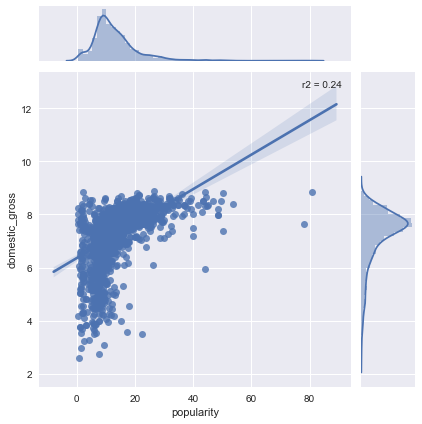

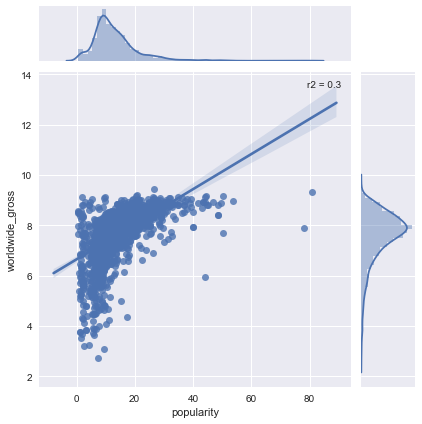

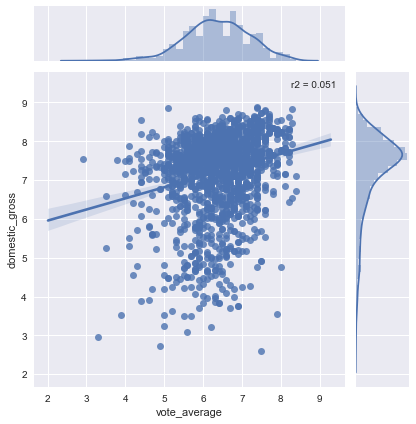

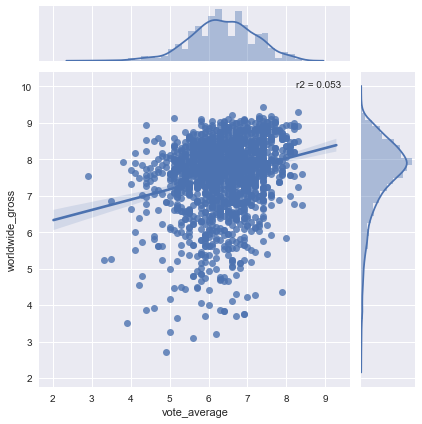

In [12]:
# import file as pandas dataframe
file_path = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/tmdb.movies.csv.gz'
tmdb = pd.read_csv(file_path, index_col=0, parse_dates=['release_date'])
# choose only english as langauge
mask = hf.create_masks(tmdb, ['original_language'], ['en'], [np.equal])
tmdb = tmdb[mask[0]]
# rename column 'title' with 'original_title' for merging
hf.rename_columns(budget, {'title': 'original_title'})
# merge with budget using original_title
merged_df = hf.merge_tables(budget, tmdb, 'original_title', how='inner')
# explore distribution of popularity
# notice spikes near zero, need to investigate
merged_df.popularity.plot.hist(bins=50, color='green')
# explore vote_average distribution
# appear to be almost normal distribution
merged_df.vote_average.plot.hist(bins=50, color='red')
# to fix popularity, we will remove vote_count under 10 to prevent bias
merged_df = merged_df[~(merged_df.vote_count < 10)]
# replot
merged_df.popularity.plot.hist(
    bins=50, color='blue', alpha=0.5)  # appear to be better
# plot scatter and find r2 for popularity versus domestic_gross columns
# before plot, we want to convert the scale into log10 and need to remove 0s
merged_df = merged_df[~(merged_df.domestic_gross == 0)]
merged_df = merged_df[~(merged_df.worldwide_gross == 0)]
merged_df.to_pickle('budget_popularity.pkl')
sns.jointplot(merged_df['popularity'], np.log10(
    merged_df['domestic_gross']), kind="reg", stat_func=hf.r2)
sns.jointplot(merged_df['popularity'], np.log10(
    merged_df['worldwide_gross']), kind="reg", stat_func=hf.r2)
sns.jointplot(merged_df['vote_average'], np.log10(
    merged_df['domestic_gross']), kind="reg", stat_func=hf.r2)
sns.jointplot(merged_df['vote_average'], np.log10(
    merged_df['worldwide_gross']), kind="reg", stat_func=hf.r2)
# popularity is R2 is 0.3 while vote_average is 0.051, we will use popularity as a metric to estimate gross income
# we will use popularity to estimate how well genres perform using tmdb data frame
# we obtained genre_map from Nick (he webscraped for us)
genre_map = {"genres": [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"},
                        {"id": 16, "name": "Animation"}, {
                            "id": 35, "name": "Comedy"},
                        {"id": 80, "name": "Crime"}, {
                            "id": 99, "name": "Documentary"},
                        {"id": 18, "name": "Drama"}, {
                            "id": 10751, "name": "Family"},
                        {"id": 14, "name": "Fantasy"},
                        {"id": 36, "name": "History"}, {
                            "id": 27, "name": "Horror"},
                        {"id": 10402, "name": "Music"}, {
                            "id": 9648, "name": "Mystery"},
                        {"id": 10749, "name": "Romance"}, {
                            "id": 878, "name": "Science Fiction"},
                        {"id": 10770, "name": "TV Movie"}, {
                            "id": 53, "name": "Thriller"},
                        {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]}
# we will make the genre_map into a dictionary of id as key and genre is value
genre_dict = {}
for genre in genre_map['genres']:
    genre_dict[genre['id']] = genre['name']
# before we convert the genre id into genres we need to remove []
# a table map so translate will remove it
table = str.maketrans(dict.fromkeys('[]'))
tmdb.genre_ids = tmdb.genre_ids.dropna().apply(lambda x: x.translate(table))
# split genreids into separate rows
genres_table = hf.split_rows(tmdb, 'id', 'genre_ids', ',')
# map genreid into genres
# remove front and back empty space
genres_table.genre_ids = genres_table.genre_ids.str.strip()
# remove empty list
genres_table = genres_table[~(genres_table.genre_ids == '')]
genres_table.genre_ids = genres_table.genre_ids.astype(int)
genres_column = genres_table.set_index('id').applymap(
    lambda x: genre_dict.get(x, np.nan))
# combine genres with popularity so we can perform study
genre_popularity = tmdb.merge(
    genres_column.reset_index(), on='id', how='inner')
# save genre_popularity table as pkl file for genre processing
genre_popularity.to_pickle('genre_popularity.pkl')

# import, prepare and combine imdb dataframes  

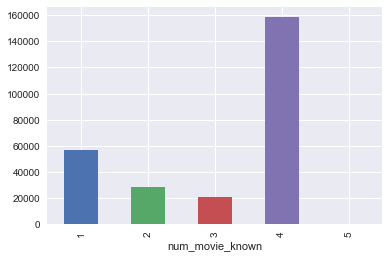

In [13]:
# load dataframe imdb.name.basics.csv
file_name = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.name.basics.csv.gz'
name = pd.read_csv(file_name)
# both birth and death have a lot of null value however we care about if the movie featured a hollywood star
# we will remove both birth and death year
hf.drop_columns(name, 'birth_year', 'death_year')
# if known_for_titles are nan most likely not a star or known actor/actress
hf.drop_NA(name, ['known_for_titles'])
# turn name into dictionary # use this for title_crew_csv later (map director/writer id to names)
name_dict_imdb = {}
for _, row in name.iterrows():
    name_dict_imdb[row['nconst']] = row['primary_name']
# filter actor and actress in primary_profession (that will be our focus )
name = name[name.primary_profession.str.contains(
    'actor|actress', regex=True, na=False)]
# drop primary profession to reduce data size
hf.drop_columns(name, 'primary_profession')
# create number of known for title as a column num_movie_known for filter known performers
name['num_movie_known'] = name.known_for_titles.str.split(
    ',').apply(lambda x: len(x))
# check for cutoff points
# set 4 or more known movie as stars
name.groupby('num_movie_known').size().plot.bar()
# we will check to see a few popular hollywood star
stars = ['Tom Cruise', 'Brad Pitt', 'Jennifer lawrence', 'Meryl Streep',
         'Leonardo DiCaprio']
# confirm that 4 star is a good place to cut for stars
name[name.primary_name.isin(stars)]
# keep only num_movie_known is 4 or higher
masks = hf.create_masks(name, ['num_movie_known'], [
                        4], relations=[np.greater_equal])
name = name[masks[0]]
# remove known for title and num_movie known as we only need nconst and primary name
hf.drop_columns(name, 'known_for_titles', 'num_movie_known')
# load data: imdb.title.principals.csv
file_crew = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.principals.csv.gz'
title_crew = pd.read_csv(file_crew)
# remove characters, job, ordering is for repeating movie id with crew info
hf.drop_columns(title_crew, 'characters', 'job', 'ordering')
# only interested in actor, actress
title_crew = title_crew[title_crew.category.isin(['actor', 'actress'])]
# merge the title_crew with name crew with nconst
imdb_merge = hf.merge_tables(title_crew, name, 'nconst', 'inner')
# remove nconst as no longer useful
hf.drop_columns(imdb_merge, 'nconst')
# create new column called num_known_actor_actress
imdb_merge['num_known_actor_actress'] = hf.object_binary(
    imdb_merge, 'category', 'actor', 'actress')
# load data: imdb.title.principals.csv
file_crew = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.principals.csv.gz'
title_crew = pd.read_csv(file_crew)
# remove characters, job, ordering is for repeating movie id with crew info
hf.drop_columns(title_crew, 'characters', 'job', 'ordering')
# only interested in actor, actress
title_crew = title_crew[title_crew.category.isin(['actor', 'actress'])]
# merge the title_crew with name crew with nconst
imdb_merge = hf.merge_tables(title_crew, name, 'nconst', 'inner')
# remove nconst as no longer useful
hf.drop_columns(imdb_merge, 'nconst')
# create new column called num_known_actor_actress
imdb_merge['num_known_actor_actress'] = hf.object_binary(
    imdb_merge, 'category', 'actor', 'actress')

# create total number of known actor actress by movie
imdb_merge = imdb_merge.groupby('tconst').sum()  # group by movies
imdb_merge = imdb_merge.reset_index()
# load imdb.title.basics.csv for titles
file_basics = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.basics.csv.gz'
title_basics = pd.read_csv(file_basics)
# remove null values for genres and runtime_mins
hf.drop_NA(title_basics, ['genres', 'runtime_minutes'])
# merge title_basics with imdb_merge for titles
imdb_merge = hf.merge_tables(imdb_merge, title_basics, 'tconst', 'inner')
# save imdb_merge as pickle for merging with tmdb later
imdb_merge.to_pickle('imdb_merge_1.pkl')
# work on directors and writers for finding the top 5 most popular director and writers
# load imdb.title.crew.csv
file_director_writer = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.crew.csv.gz'
writers_directors = pd.read_csv(file_director_writer)
# create directors and writers separately to prevent repeat rows
directors = writers_directors[['tconst', 'directors']].dropna()
directors = hf.split_rows(directors, 'tconst', 'directors', ',')
# map director number to name
directors = directors.set_index('tconst').applymap(
    lambda x: name_dict_imdb.get(x, np.nan))

# create directors and writers separately to prevent repeat rows
writers = writers_directors[['tconst', 'writers']].dropna()
writers = hf.split_rows(writers, 'tconst', 'writers', ',')
# map writer number to name
writers = writers.set_index('tconst').applymap(
    lambda x: name_dict_imdb.get(x, np.nan))
# create writers_title
# create directors_title
writers_title = writers.merge(imdb_merge, on='tconst', how='inner')
directors_title = directors.merge(imdb_merge, on='tconst', how='inner')
# save these data frame to find top 5 most desirable writers/directors
writers_title.to_pickle('writers_title.pkl')
directors_title.to_pickle('directors_title.pkl')

# plot important visuals 

## use genre popularity to find relationships 

### genre alone has very similar popularity distribution
### genre vs month popularity median 

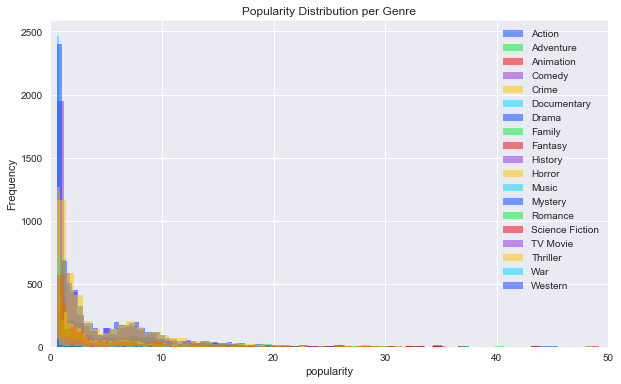

In [14]:
# we will only look at the last 10 years (before 2009 1-1)
genre_popularity = pd.read_pickle('genre_popularity.pkl')
genre_popularity = genre_popularity[(
    genre_popularity.release_date > '2009-6-17') & (genre_popularity.release_date < '2018-12-31')]
# obtain month from release_date column
genre_popularity['month'] = genre_popularity.release_date.dt.month
# clean up the data frame a bit before further use
genre_popularity = genre_popularity[['popularity', 'month', 'genre_ids_y']]
hf.rename_columns(genre_popularity, {'genre_ids_y': 'genres'})
# save for non technical presentation
genre_popularity.to_pickle('genre_popularity.pkl')
# look at popularity by genre distribtion
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize=(10, 6))
genre_popularity.groupby('genres').popularity.plot(
    kind='hist', ax=ax, alpha=0.5, bins=100)
plt.title('Popularity Distribution per Genre')
plt.xlabel('popularity')
plt.xlim([0, 50])
plt.legend()
plt.show()
# appear to have the same popularity distribution

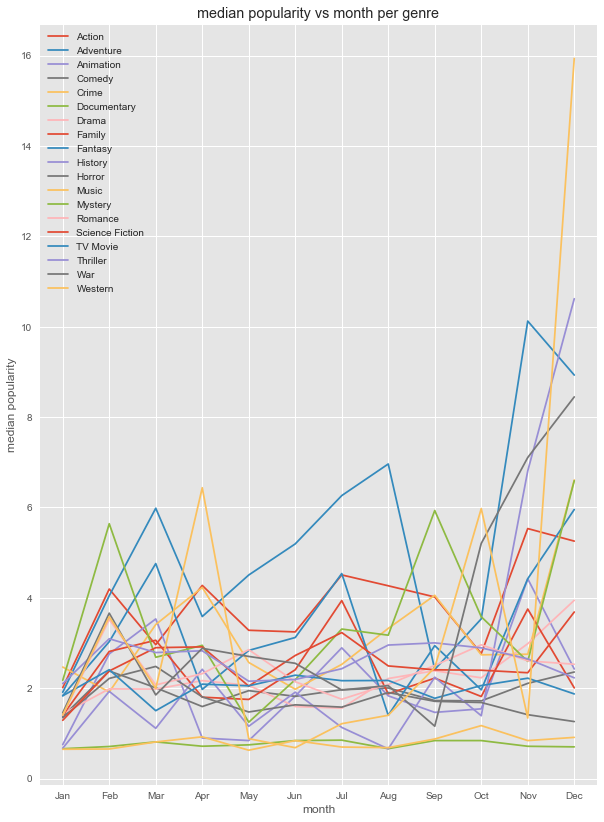

In [15]:
# distribution of genres appear to be skewed so we will use median not mean
# create groupby dataframe
genre_popularity_month = genre_popularity.groupby(
    ['genres', 'month'])['popularity'].median().reset_index()
# use pivot to make into a long format
genre_popularity_month = genre_popularity_month.pivot(
    index='month', columns='genres', values='popularity')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 14))
genre_popularity_month.plot(ax=ax)
plt.title('median popularity vs month per genre')
plt.xlabel('month')
plt.xticks(list(range(1, 13)), ['Jan', 'Feb', 'Mar', 'Apr',
                                'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim([0.5, 12.5])
plt.ylabel('median popularity')
plt.legend(loc='upper left')
plt.show()
# except for western the genres appear to be doing the same throughout the months

# Top 5 writers and directors for best average popularity 

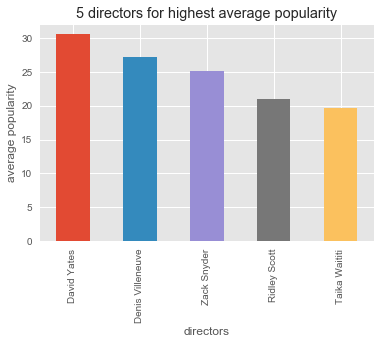

In [16]:
# keep vote count above 10 for tmdb to prevent low voting count affect regularization
tmdb = tmdb[tmdb.vote_count >= 10]
# top 5 directors
merged_directors_tmdb = hf.merge_tables(
    tmdb, directors_title, 'original_title', 'inner')
# check for how many times each directors direct movies to remove low counts
directors_count = merged_directors_tmdb.groupby(
    'directors').size().sort_values(ascending=False).reset_index()
# change 0 to proper column name
hf.rename_columns(directors_count, {0: 'movie_count'})
# merge with merged_directors_tmdb
merged_directors_count = hf.merge_tables(
    directors_count, merged_directors_tmdb, 'directors', 'inner')
# clean up the table
merged_directors_count = merged_directors_count[[
    'directors', 'popularity', 'movie_count', 'start_year']]
# filter for after 2009 and direct count above 3 movies
merged_directors_count[(merged_directors_count['movie_count'] > 5) & (merged_directors_count.start_year >= 2009)].groupby(
    'directors')['popularity'].mean().sort_values(ascending=False)[:5].plot.bar()
plt.ylabel('average popularity')
plt.title('5 directors for highest average popularity')
plt.show()

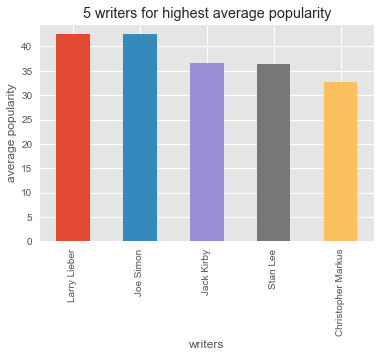

In [17]:
# top 5 writers
merged_writers_tmdb = hf.merge_tables(
    tmdb, writers_title, 'original_title', 'inner')
# check for how many times each directors direct movies to remove low counts
writers_count = merged_writers_tmdb.groupby(
    'writers').size().sort_values(ascending=False).reset_index()
# change 0 to proper column name
hf.rename_columns(writers_count, {0: 'movie_count'})
# merge with merged_directors_tmdb
merged_writers_count = hf.merge_tables(
    writers_count, merged_writers_tmdb, 'writers', 'inner')
# clean up the table
merged_writers_count = merged_writers_count[[
    'writers', 'popularity', 'movie_count', 'start_year']]
# filter for after 2009 and direct count above 3 movies
merged_writers_count[(merged_writers_count['movie_count'] > 5) & (merged_directors_count.start_year >= 2009)].groupby(
    'writers')['popularity'].mean().sort_values(ascending=False)[:5].plot.bar()
plt.ylabel('average popularity')
plt.title('5 writers for highest average popularity')
plt.show()

# Hire known or unknown actor or actress

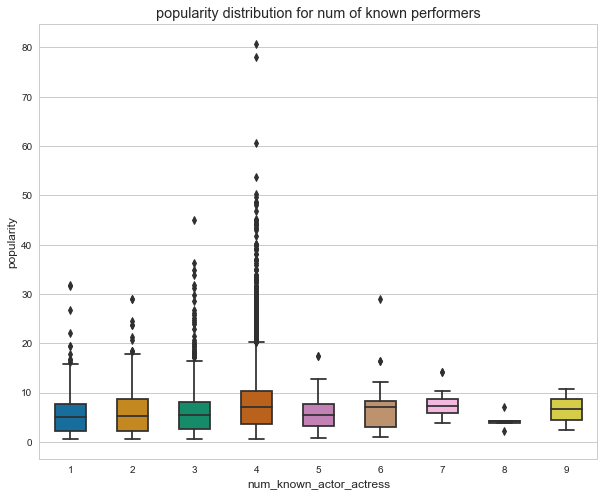

In [18]:
# need to merge with imdb to get popularity
imdb_merge = pd.read_pickle('imdb_merge_1.pkl')

performer_popularity = hf.merge_tables(
    imdb_merge, tmdb, 'original_title', 'inner')
# only choose relevant columns, runtime for last analysis
performer_popularity = performer_popularity[[
    'num_known_actor_actress', 'runtime_minutes', 'popularity']]
performer_popularity.to_pickle('performer_popularity.pkl')
# plot group by num_known_actor_actress
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
bplot = sns.boxplot(y='popularity', x='num_known_actor_actress',
                    data=performer_popularity,
                    width=0.5,
                    palette="colorblind")
plt.title('popularity distribution for num of known performers')
plt.show()

# What movie length to focus on 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


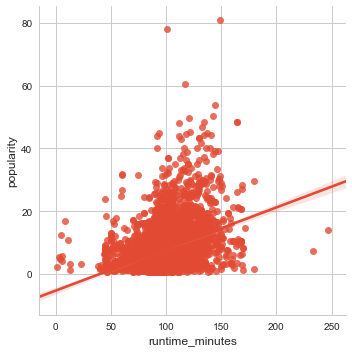

In [19]:
sns.set_style('whitegrid')
sns.lmplot(y='popularity', x='runtime_minutes', data=performer_popularity)